# Exploring the trajectory of a single patient

### Import Python libraries

We first need to import some tools for working with data in Python. 
- NumPy is for working with numbers
- Pandas is for analysing data
- MatPlotLib is for making plots
- Sqlite3 to connect to the database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Connect to the database

- TODO: Set up a database connection to oracle.

In [3]:
# Connect to the MIMIC database
# ...

### Load the chartevents data

- The chartevents table contains data charted at the patient bedside. It includes variables such as heart rate, respiratory rate, temperature, and so on.
- We'll begin by loading the chartevents data for a single patient.

In [2]:
# query = """
# SELECT de.hadm_id
#   , (de.charttime-ad.admittime)*24.0 as HOURS
#   , di.label
#   , de.value
#   , de.valuenum
#   , de.uom
# FROM mimiciii.chartevents de
# INNER join mimiciii.d_items di
# ON de.itemid = di.itemid
# INNER join mimiciii.admissions ad
# ON de.hadm_id = ad.hadm_id
# WHERE de.subject_id = 151
# ORDER BY charttime;
# """
# 
# ce = pd.read_sql_query(query,conn)


# load chartevents from a CSV file
ce = pd.read_csv('data/example_chartevents_151.csv')

### Plot 1: How did the patients heart rate change over time?

- Using the methods described above to select our data of interest, we can create our x and y axis values to create a time series plot of heart rate.

In [18]:
(ce.LABEL.unique())

array(['PT(11-13.5)', 'INR (2-4 ref. range)', 'Platelets',
       'Potassium (3.5-5.3)', 'RBC', 'Sodium (135-148)',
       'Total Bili (0-1.5)', 'Triglyceride (0-200)', 'WBC (4-11,000)',
       'WBC   (4-11,000)', 'ALT', 'AST', 'Albumin (>3.2)',
       'Alk. Phosphate', 'Amylase', 'BUN (6-20)', 'CPK', 'Carbon Dioxide',
       'Chloride (100-112)', 'Cholesterol (<200)', 'Creatinine (0-1.3)',
       'Differential-Basos', 'Differential-Eos', 'Differential-Lymphs',
       'Differential-Monos', 'Differential-Polys', 'Glucose (70-105)',
       'Hematocrit', 'Hemoglobin', 'PTT(22-35)', 'Ectopy Frequency',
       'Orientation', 'Angio Appearance #1 [Attribute 1]',
       'Angio Dressing #1', 'Angio Site #1', 'Arterial BP [Systolic]',
       'Arterial BP Mean', 'PostTib. Pulses [Right]', 'Precautions',
       'RLE [Temperature]', 'RLL Lung Sounds', 'RUL Lung Sounds',
       'Respiratory Pattern', 'Respiratory Rate', 'LLL Lung Sounds',
       'LUE [Temp]', 'LUL Lung Sounds', 'Level of Conscious'

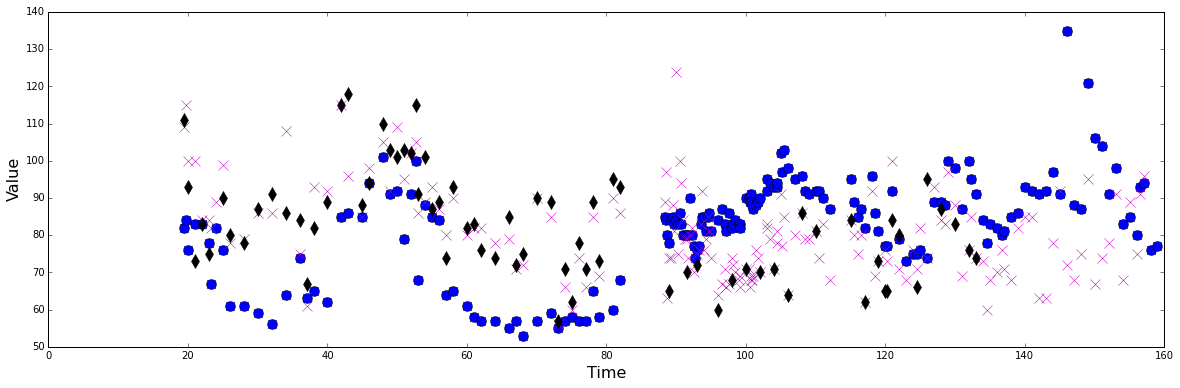

In [22]:

plt.figure(figsize=(20, 6))

# Plot time against heart rate
plt.plot(ce.HOURS[ce.LABEL=='Heart Rate'], 
         ce.VALUENUM[ce.LABEL=='Heart Rate'],
         'bo', markersize=10, linewidth=4)

#plt.plot(ce.HOURS[ce.LABEL=='Respiratory Rate'], 
#         ce.VALUENUM[ce.LABEL=='Respiratory Rate'],
#         'k+', markersize=10, linewidth=4)

plt.plot(ce.HOURS[ce.LABEL=='Arterial BP Mean'], 
         ce.VALUENUM[ce.LABEL=='Arterial BP Mean'],
         'mx', markersize=10, linewidth=4)

plt.plot(ce.HOURS[ce.LABEL=='IABP Mean'], 
         ce.VALUENUM[ce.LABEL=='IABP Mean'],
         'kd', markersize=10, linewidth=4)


# Iterate over list of GCS labels, plotting around 1 in 10 to avoid overlap
#for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Eye Opening'].values):
#    if np.mod(i,6)==0 and i < 65:
#        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Eye Opening'].values[i],140),fontsize=14)
        
        
# IABP Mean
# IABP Setting
# Arterial BP Mean
# 

plt.xlabel('Time',fontsize=16)
plt.ylabel('Value',fontsize=16)